In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# Project Goals
The team, **Collette Riviere and Toby Mendels**, will likely be investigating data sets related to covid-19 infection rates, vaccine hesitancy rates, political opinions, and more. Most of the data will come from the US Census Bureau, specifically the Household Pulse Survey. From this survey, we are interested in vaccine hesitancy by county and state The Covid-19 vaccine was a devicive issue for many people so looking at vaccine hesitency before the Covid-19 pandemic could help indicate which who and what parts of the US were most reluctant or hesitant about vaccines. This relates to the second dataset, daily Covid-19 infection reports across cities/states. This dataset can help investigate how Covid-19 spread across the USA from Janurary 2020 to March 2023 and how different states were affected by the pandemic over time. Both datasets in conjunction can help answer questions such as, "Did states with more vaccine hesitancy have higher rates of Covid-19 infection, especially after the Covid-19 vaccine was released?" and "Did vaccines decrease the Covid-19 infection rate (assuming people with little vaccine hesitancy got the Coid-19 vaccine)?".


The website that released the Household Pulse Survey results can be found here: https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html. 

COVID-19 infection reports can be found here: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md.


### Collaboration Plan
The team plans to meet every other week to work on this project to finalize the project, discuss next steps, and help each other. We will also be communicating over text messages to update each other with our progress. We have also set up a shared Github repository to house and update our code.

# Table 1: Vaccine hesitancy statistics by county

We start by reading the csv into a data frame and deleting the columns that we don't need such as the state boundaries, county boundaries, and geographical point (longtitide and latitude).

In [ ]:

hesitancy_df = pd.read_csv('/Users/tobymendels/downloads/Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv')
hesitancy_df.drop(labels=['County Boundary', 'State Boundary', 'Geographical Point'], axis=1, inplace=True)
hesitancy_df.head()

Then we can make a correlation table of all the quantitaive variables to get some ideas of what variables correlate with what. This will help give us a basic idea of what we should look at more and what we will be able to take away from this data table. We can also look at some basic summary statistics for the variables to give us a better picture of the data

In [ ]:
variables = ['Estimated hesitant', 
             'Estimated hesitant or unsure', 
             'Estimated strongly hesitant', 
             'Social Vulnerability Index (SVI)',
              'CVAC level of concern for vaccination rollout',
               'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                'Percent Hispanic',
                'Percent non-Hispanic American Indian/Alaska Native',
                'Percent non-Hispanic Asian',
                'Percent non-Hispanic Black',
                'Percent non-Hispanic Native Hawaiian/Pacific Islander',
                'Percent non-Hispanic White'
                     ]
hesitancy_df[variables].corr()

In [ ]:
hesitancy_df[variables].describe()

We can see that the 3 columns that talk about hesitancy are very strongly correlated, and when we look at summary statistics, we can see that on average the "Estimated hesitant or unsure" is slightly higher than the "Estimated hesitant" and the "Estimated strongly hesitant" is slightly below. Knowing this, we will look only at the "Estimated hesitant" column in order to simplify things.

In [ ]:
hesitancy_df.drop(labels=['Estimated hesitant or unsure', 'Estimated strongly hesitant'], axis=1, inplace=True)

The social vulernability index is define as "a database that helps emergency response planners and public health officials identify, map, and plan support for communities that will most likely need support before, during, and after a public health emergency." It acts as an estimate of how much support a county will need in the event of a punlic health emergency based off a large number of factors. Below we can make a scatter of the percent of a county that is white compared to the SVI. The colors show the CVAC level of concern for the vaccine rollout. The CVAC shows concern rolling out the vaccine due to the following 5 factors: "historic undervaccination, sociodemographic barriers, resource-constrained healthcare system, healthcare accessibility barriers, and irregular care-seeking behaviors."

In [ ]:
colors = hesitancy_df['CVAC Level Of Concern'].map({
    'Very High Concern' : 'red',
    'High Concern' : 'orange',
    'Moderate Concern' : 'yellow',
    'Low Concern' : 'blue',
    'Very Low Concern' : 'purple',
    
})

hesitancy_df.plot.scatter(x=['Percent non-Hispanic White'], y='Social Vulnerability Index (SVI)', c = colors, alpha = 0.5)

# Table 2: Confirmed Covid-19 cases by state, 2020:2023

This data is from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. Over the course of three years, (1/22/20 to 3/9/23) data on the daily confirmed cases, deaths, and recoveries from Covid-19 were published to this Github repository: https://github.com/CSSEGISandData/COVID-19.git. The data is reported by city and state, but for ease, we chose to look at the state level so rows were aggregated to one row per state (or territory). Additionally, this dataset is being used to look at Covid-19 cases over time (dates), all other columns were dropped.

In [155]:
confirmed_df = pd.read_csv("/Users/colletteriviere/Downloads/time_series_covid19_confirmed_US.csv")
confirmed_df.drop(columns=['iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','UID'], inplace=True)
confirmed_df.head()

,Admin2,Province_State,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Autauga,Alabama,"Autauga, Alabama, US",0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Baldwin,Alabama,"Baldwin, Alabama, US",0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Barbour,Alabama,"Barbour, Alabama, US",0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Bibb,Alabama,"Bibb, Alabama, US",0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Blount,Alabama,"Blount, Alabama, US",0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [140]:
confirmed_df.drop(columns=['Admin2','Province_State','Combined_Key'],inplace=True)

In [141]:
Alabamadata = confirmed_df.iloc[0:68]
Alaskadata =confirmed_df.iloc[69:101]
AmericanSamoadata =confirmed_df.iloc[102]
Arizonadata = confirmed_df.iloc[103:119]
Arkansasdata = confirmed_df.iloc[120:196]
Californiadata = confirmed_df.iloc[197:256]
Coloradodata = confirmed_df.iloc[257:322]
Connecticutdata = confirmed_df.iloc[323:332]
Delawaredata = confirmed_df.iloc[333:337]
DiamondPrincessdata = confirmed_df.iloc[338]
DistrictofColumbiadata = confirmed_df.iloc[339:341]
Floridadata = confirmed_df.iloc[342:410]
Georgiadata = confirmed_df.iloc[411:571]
GrandPrincessdata = confirmed_df.iloc[572] 
Guamdata = confirmed_df.iloc[573]
Hawaiidata = confirmed_df.iloc[574:580]
Idahodata = confirmed_df.iloc[581:626]
Illinoisdata = confirmed_df.iloc[627:730]
Indianadata = confirmed_df.iloc[731:824]
Iowadata = confirmed_df.iloc[825:925]
Kansasdata = confirmed_df.iloc[926:1032]
Kentuckydata = confirmed_df.iloc[1033:1154]
Louisianadata = confirmed_df.iloc[1155:1220]
Mainedata = confirmed_df.iloc[1221:1239]
Marylanddata = confirmed_df.iloc[1240:1264]
Massachusettsdata = confirmed_df.iloc[1265:1281]
Michigandata = confirmed_df.iloc[1282:1368]
Minnesotadata = confirmed_df.iloc[1369:1457]
Mississippidata = confirmed_df.iloc[1458:1541]
Missouridata = confirmed_df.iloc[1542:1659]
Montanadata = confirmed_df.iloc[1660:1717]
Nebraskadata = confirmed_df.iloc[1718:1812]
Nevadadata = confirmed_df.iloc[1813:1831]
NewHampshiredata = confirmed_df.iloc[1832:1843]
NewJerseydata = confirmed_df.iloc[1844:1866]
NewMexicodata = confirmed_df.iloc[1867:1901]
NewYorkdata = confirmed_df.iloc[1902:1965]
NorthCarolinadata = confirmed_df.iloc[1966:2067]
NorthDakotadata = confirmed_df.iloc[2068:2122]
NorthernMarianaIslandsdata = confirmed_df.iloc[2123]
Ohiodata = confirmed_df.iloc[2124:2213]
Oklahomadata = confirmed_df.iloc[2214:2292]
Oregondata = confirmed_df.iloc[2293:2330]
Pennsylvaniadata = confirmed_df.iloc[2331:2399]
PuertoRicodata = confirmed_df.iloc[2400:2479]
RhodeIslanddata = confirmed_df.iloc[2480:2486]
SouthCarolinadata = confirmed_df.iloc[2487:2534]
SouthDakotadata = confirmed_df.iloc[2535:2602]
Tennesseedata = confirmed_df.iloc[2603:2699]
Texasdata = confirmed_df.iloc[2700:2955]
Utahdata = confirmed_df.iloc[2956:2992]
Vermontdata = confirmed_df.iloc[2993:3008]
VirginIslandsdata = confirmed_df.iloc[3009]
Virginiadata = confirmed_df.iloc[3010:3144]
Washingtondata = confirmed_df.iloc[3145:3185]
WestVirginiadata = confirmed_df.iloc[3186:3242]
Wisconsindata = confirmed_df.iloc[3243:3316]
Wyomingdata = confirmed_df.iloc[3317:3341]



confirmed_state_by_day = pd.concat({'Alabama': Alabamadata.sum(),
                            'Alaska': Alaskadata.sum(),
                            'American Samoa': AmericanSamoadata,
                            'Arizona': Arizonadata.sum(),
                            'Arkansas': Arkansasdata.sum(),
                            'California': Californiadata.sum(),
                            'Colorado': Coloradodata.sum(),
                            'Connecticut': Connecticutdata.sum(),
                            'Delaware': Delawaredata.sum(),
                            'Diamond Princess': DiamondPrincessdata,
                            'District of Columbia': DistrictofColumbiadata.sum(),
                            'Florida': Floridadata.sum(),
                            'Georgia': Georgiadata.sum(),
                            'Grand Princess': GrandPrincessdata,
                            'Guam': Guamdata,
                            'Hawaii': Hawaiidata.sum(),
                            'Idaho': Idahodata.sum(),
                            'Illinois': Illinoisdata.sum(),
                            'Indiana': Indianadata.sum(),
                            'Iowa': Iowadata.sum(),
                            'Kansas': Kansasdata.sum(),
                            'Kentucky': Kentuckydata.sum(),
                            'Louisiana': Louisianadata.sum(),
                            'Maine': Mainedata.sum(),
                            'Maryland': Marylanddata.sum(),
                            'Massachusetts': Massachusettsdata.sum(),
                            'Michigan': Michigandata.sum(),
                            'Minnesota': Minnesotadata.sum(),
                            'Mississippi': Mississippidata.sum(),
                            'Missouri': Missouridata.sum(),
                            'Montana': Montanadata.sum(),
                            'Nebraska': Nebraskadata.sum(),
                            'Nevada': Nevadadata.sum(),
                            'New Hampshire': NewHampshiredata.sum(),
                            'New Jersey': NewJerseydata.sum(),
                            'New Mexico': NewMexicodata.sum(),
                            'New York': NewYorkdata.sum(),
                            'North Carolina': NorthCarolinadata.sum(),
                            'North Dakota': NorthDakotadata.sum(),
                            'Northern Mariana Islands': NorthernMarianaIslandsdata,
                            'Ohio': Ohiodata.sum(),
                            'Oklahoma': Oklahomadata.sum(),
                            'Oregon': Oregondata.sum(),
                            'Pennsylvania': Pennsylvaniadata.sum(),
                            'Puerto Rico': PuertoRicodata.sum(),
                            'Rhode Island': RhodeIslanddata.sum(),
                            'South Carolina': SouthCarolinadata.sum(),
                            'South Dakota': SouthDakotadata.sum(),
                            'Tennessee': Tennesseedata.sum(),
                            'Texas': Texasdata.sum(),
                            'Utah': Utahdata.sum(),
                            'Vermont': Vermontdata.sum(),
                            'Virgin Islands': VirginIslandsdata,
                            'Virginia': Virginiadata.sum(),
                            'Washington': Washingtondata.sum(),
                            'West Virginia': WestVirginiadata.sum(),
                            'Wisconsin': Wisconsindata.sum(),
                            'Wyoming':Wyomingdata.sum()
                           }, axis=1).T

confirmed_state_by_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Alabama,0,0,0,0,0,0,0,0,0,0,...,1628943,1632642,1632642,1632642,1632642,1632642,1632642,1632642,1635106,1635106
Alaska,0,0,0,0,0,0,0,0,0,0,...,305325,305325,305325,305325,305325,305325,305325,305898,305898,305898
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
Arizona,0,0,0,0,1,1,1,1,1,1,...,2363787,2369251,2369251,2369251,2369251,2369251,2369251,2369251,2372340,2372340
Arkansas,0,0,0,0,0,0,0,0,0,0,...,997159,997159,997619,997870,998196,998253,998335,998741,999027,999287
California,0,0,0,0,2,2,2,2,2,3,...,12075729,12075729,12085972,12088295,12088295,12088295,12088295,12099041,12099041,12107775
Colorado,0,0,0,0,0,0,0,0,0,0,...,1758153,1758993,1758993,1760681,1760681,1760681,1761232,1761232,1762059,1762059
Connecticut,0,0,0,0,0,0,0,0,0,0,...,943864,944022,944152,944340,944614,944679,944757,944909,945092,945243
Delaware,0,0,0,0,0,0,0,0,0,0,...,329219,329683,329683,329683,329683,329683,329683,329683,329683,329683
Diamond Princess,0,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


Now, we can look at the cases of covid over 3 years, state by state and as a whole country. This is give us an idea of trends of reported covid cases over time and how they vary state to state. Below is a plot of daily reported covid-19 cases, from 1/22/20 to 3/9/23. 

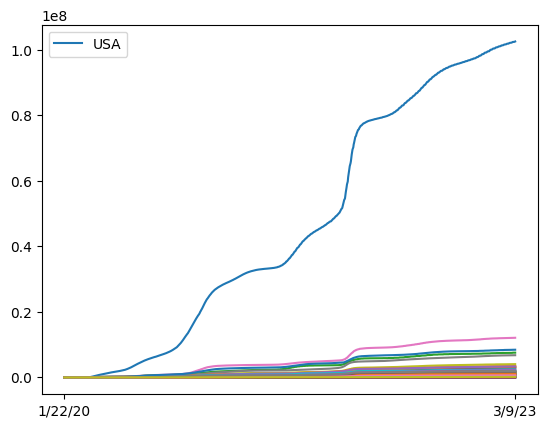

In [134]:
wholecountry = pd.DataFrame(confirmed_state_by_day.sum())
wholecountry.rename({0:'USA'},axis='columns',inplace=True)

plt.plot(wholecountry.index,wholecountry['USA'],label="USA")
for i in confirmed_state_by_day.index:
    plt.plot(wholecountry.index,confirmed_state_by_day.loc[i])
plt.xticks(ticks=[0,1142], labels=['1/22/20','3/9/23'])
plt.legend(loc='upper left')
plt.show()


From the plot, we can see that some states has many more Covid-19 cases than others, some saw outbreaks when others didnt, and some didn't have many Covid-19 cases at all. This can help us answer questions about how Covid-19 impacted different states and what states were impacted the most at different times.

To look at this data a bit closer, we can look at the average number of cases every month. First, we can calculate the average number of cases over each month and three months period of the dataset. Then we can look at the summary statistics for that data.

In [282]:
confirmed_state_by_day.T.rolling(window=1,step=31).mean().T

,1/22/20,2/22/20,3/24/20,4/24/20,5/25/20,6/25/20,7/26/20,8/26/20,9/26/20,10/27/20,...,5/8/22,6/8/22,7/9/22,8/9/22,9/9/22,10/10/22,11/10/22,12/11/22,1/11/23,2/11/23
Alabama,0.0,0.0,298.0,6082.0,15241.0,33668.0,79570.0,119365.0,150232.0,186330.0,...,1294828.0,1315327.0,1365853.0,1428331.0,1495652.0,1516950.0,1531454.0,1546161.0,1586949.0,1618312.0
Alaska,0.0,0.0,43.0,343.0,425.0,980.0,3100.0,5713.0,8304.0,14689.0,...,253028.0,263066.0,273777.0,285203.0,293935.0,297192.0,296968.0,298670.0,300564.0,303335.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5923.0,6192.0,6505.0,7952.0,8217.0,8250.0,8257.0,8265.0,8302.0,8320.0
Arizona,0.0,1.0,324.0,6003.0,15905.0,57917.0,151725.0,187356.0,204147.0,226452.0,...,1962719.0,2014343.0,2081998.0,2145249.0,2190612.0,2207458.0,2232223.0,2284438.0,2321539.0,2333677.0
Arkansas,0.0,0.0,219.0,2807.0,5930.0,17583.0,37663.0,56905.0,79503.0,106338.0,...,830296.0,840940.0,869684.0,905144.0,933375.0,946802.0,955606.0,967133.0,982870.0,991775.0
California,0.0,10.0,2499.0,41451.0,97420.0,206536.0,463895.0,688518.0,808690.0,920240.0,...,9272039.0,9726838.0,10255863.0,10842385.0,11148026.0,11279326.0,11399191.0,11624350.0,11897180.0,12014332.0
Colorado,0.0,0.0,911.0,17313.0,27838.0,34450.0,49336.0,59543.0,73807.0,112952.0,...,1445702.0,1506399.0,1567179.0,1611503.0,1637255.0,1658124.0,1683103.0,1715816.0,1738423.0,1749570.0
Connecticut,0.0,0.0,616.0,23797.0,40508.0,45399.0,48118.0,51435.0,55629.0,67229.0,...,739874.0,787368.0,809245.0,832867.0,851497.0,872705.0,886976.0,903167.0,926303.0,939506.0
Delaware,0.0,0.0,104.0,3438.0,8910.0,10959.0,14103.0,16710.0,19667.0,24158.0,...,263499.0,277930.0,286087.0,296133.0,303321.0,308630.0,313583.0,317447.0,323008.0,326762.0
Diamond Princess,0.0,0.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,...,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0


In [290]:
# month average
confirmed_state_by_day.T.rolling(window=1,step=31).mean().T.describe()

,1/22/20,2/22/20,3/24/20,4/24/20,5/25/20,6/25/20,7/26/20,8/26/20,9/26/20,10/27/20,...,5/8/22,6/8/22,7/9/22,8/9/22,9/9/22,10/10/22,11/10/22,12/11/22,1/11/23,2/11/23
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
mean,0.017241,0.258621,970.344828,15683.155172,28366.068966,41177.103448,71887.172414,99423.568966,120820.862069,149979.672414,...,1.394850e+06,1.451700e+06,1.507419e+06,1.572249e+06,1.620618e+06,1.645784e+06,1.667450e+06,1.692256e+06,1.728225e+06,1.750724e+06
std,0.131306,1.345041,3397.930229,39137.059333,54515.530823,64539.768871,106525.247413,150203.754986,174793.461883,199554.183717,...,1.751486e+06,1.824190e+06,1.907489e+06,2.003369e+06,2.063884e+06,2.091574e+06,2.114644e+06,2.148341e+06,2.196938e+06,2.223942e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
25%,0.000000,0.000000,72.000000,1386.250000,2448.750000,3736.750000,6014.500000,10682.000000,16328.000000,23387.750000,...,2.556458e+05,2.811105e+05,2.928342e+05,3.045080e+05,3.126730e+05,3.189252e+05,3.244200e+05,3.283358e+05,3.343248e+05,3.382612e+05
50%,0.000000,0.000000,240.000000,4077.500000,11079.500000,18450.000000,39796.500000,55832.500000,74846.500000,99963.000000,...,8.104830e+05,8.230725e+05,8.532370e+05,8.917270e+05,9.313645e+05,9.505895e+05,9.608520e+05,9.733840e+05,9.859720e+05,9.934330e+05
75%,0.000000,0.000000,603.750000,14775.000000,32249.750000,51787.000000,84209.500000,113761.250000,143633.250000,183568.250000,...,1.673489e+06,1.721648e+06,1.763696e+06,1.821423e+06,1.877942e+06,1.898896e+06,1.923524e+06,1.952575e+06,1.986618e+06,2.008751e+06
max,1.000000,10.000000,25681.000000,278445.000000,366351.000000,392654.000000,463895.000000,688518.000000,808690.000000,920240.000000,...,9.272039e+06,9.726838e+06,1.025586e+07,1.084238e+07,1.114803e+07,1.127933e+07,1.139919e+07,1.162435e+07,1.189718e+07,1.201433e+07


In [291]:
# 3 month average
confirmed_state_by_day.T.rolling(window=1,step=91).mean().T.describe()

,1/22/20,4/22/20,7/22/20,10/21/20,1/20/21,4/21/21,7/21/21,10/20/21,1/19/22,4/20/22,7/20/22,10/19/22,1/18/23
count,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01
mean,0.017241,14601.086207,67414.965517,142422.275862,4.189115e+05,5.441217e+05,5.843671e+05,7.708779e+05,1.172377e+06,1.376494e+06,1.532601e+06,1.652120e+06,1.733747e+06
std,0.131306,37272.982318,99933.384611,193155.814537,5.519499e+05,7.086023e+05,7.530162e+05,9.806618e+05,1.465007e+06,1.728364e+06,1.946262e+06,2.098109e+06,2.203132e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.800000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
25%,0.000000,1331.750000,5554.000000,21232.000000,7.857775e+04,1.015638e+05,1.069605e+05,1.407205e+05,2.163505e+05,2.525302e+05,2.975202e+05,3.211608e+05,3.346262e+05
50%,0.000000,3552.500000,35888.000000,92049.500000,2.719895e+05,3.451300e+05,3.698610e+05,4.939960e+05,6.791250e+05,8.081515e+05,8.689255e+05,9.535000e+05,9.879420e+05
75%,0.000000,13677.500000,79991.250000,173833.000000,5.517620e+05,6.462268e+05,6.806288e+05,8.924635e+05,1.407911e+06,1.653084e+06,1.781921e+06,1.906804e+06,1.992279e+06
max,1.000000,266280.000000,430288.000000,891398.000000,3.152718e+06,3.781002e+06,3.949648e+06,4.845802e+06,7.416760e+06,9.154332e+06,1.050189e+07,1.131812e+07,1.193005e+07


From these summary statistics, there was a massive increase in cases from Feburary to March in 2020 (increased 2500 fold) and also from May to June 2020 (increased 10 fold). After the Covid-19 vaccine was released (December 2020), the following months (Janurary 2021 to July 2021) saw cases plateu. This can help speak to the effectiveness of the vaccine and also potentially quarentine.